In [1]:
import sympy
import numpy
from matplotlib import pyplot
import ipywidgets as ipw
%matplotlib inline

In [2]:
sympy.init_printing()

In [4]:
u_max = sympy.symbols('u_max')
u_star = sympy.symbols('u_star')
rho_max = sympy.symbols('rho_max')
rho_star = sympy.symbols('rho_star')
A, B = sympy.symbols('A B')

In [5]:
u_max

In [6]:
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

In [11]:
eq1
eq2
eq3

In [10]:
eq2 - 3*eq3

In [12]:
eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)

In [13]:
eq4

In [14]:
eq4.simplify()

In [18]:
rho_star_sol = sympy.solve(eq4, rho_star)[0]
rho_star_sol

In [19]:
type(rho_star_sol)

sympy.core.mul.Mul

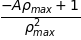

In [22]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

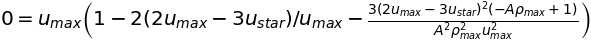

In [25]:
eq5 = eq2.subs([(rho_star, rho_star_sol), (B, B_sol)])
eq5

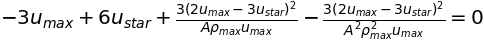

In [26]:
eq5.simplify()

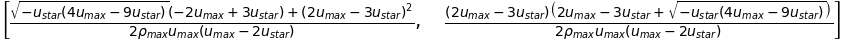

In [28]:
A_sol = sympy.solve(eq5, A)
A_sol

In [30]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

In [31]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

In [33]:
A_val = max(A_val_0, A_val_1)
A_val
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

In [34]:
def cubic_flux(rho, u_max, A, B):
    F = rho * u_max * (1 - A * rho - B * rho ** 2)
    return F

In [35]:
rho_max = 10.0
u_max = 1.0
L = 4
nx = 81
dx = L/(nx - 1)
x = numpy.linspace(0, L, num = nx)

In [37]:
rho0 = numpy.zeros_like(x)
mask = x<2.0
rho0[mask] = rho_max * x[mask]/2

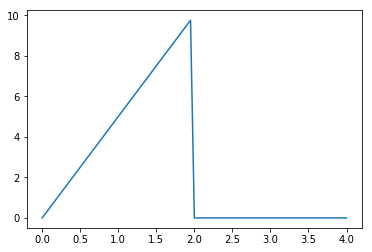

In [38]:
pyplot.plot(x, rho0)

In [99]:
sigma = 0.5
dt = sigma*dx/u_max
mt = 30
type(dt)
type(A)

sympy.core.symbol.Symbol

In [100]:
def flux(rho, u_max, A, B):
    F = rho * u_max * (1- A * rho - B * rho ** 2)
    return F

In [101]:
def FTBS(u_max, A, B, rho0, mt):
    rho_hist = [rho0]
    rho = rho0.copy()
    for i in range(mt):
        F = flux(rho, u_max, A, B)
        rho[1:] = rho[1:] - dt/dx * (F[1:] - F[:-1])
        rho_hist.append(rho.copy())
    return rho_hist
        

In [102]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('Time step: {}'.format(n))
    pyplot.xlabel('Road [km]')
    pyplot.ylabel('Traffic density [cars/hr]')
    pyplot.plot(x, rho_hist[n])
   
    pyplot.show

In [103]:
rho_hist = FTBS(u_max, A_val, B_val, rho0, mt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


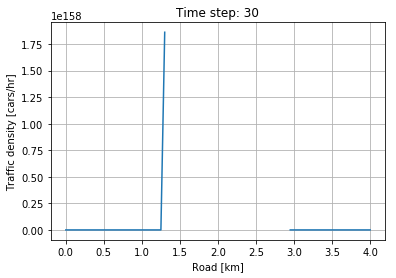

In [104]:
plot(30, x, rho_hist)

In [105]:
def lax_friedrichs(rho0, mt, A,B, u_max):
    rho_hist = [rho0]
    rho = rho0.copy()
    for i in range(mt):
        F = flux(rho, u_max, A, B)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]))
        rho_hist.append(rho.copy())
    return rho_hist

In [106]:
rho_hist2 = lax_friedrichs(rho0, mt, A_val, B_val, u_max)

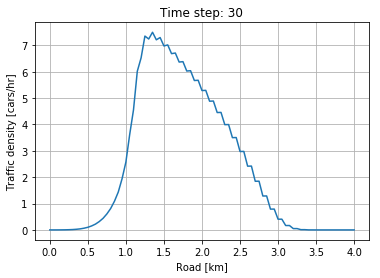

In [107]:
plot(30, x, rho_hist2)

In [108]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) -1
    nt_slider = ipw.IntSlider(value = 0, min = 0, max = nt, step = 1, description = 'Time step')
    w = ipw.interactive(plot, n = nt_slider, x = ipw.fixed(x), rho_hist = ipw.fixed(rho_hist))
    return w

In [109]:
interactive_plot(x, rho_hist2)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…